In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-data-simulation-it-industry/employee_data.csv


In [5]:
data = pd.read_csv('/kaggle/input/employee-data-simulation-it-industry/employee_data.csv')


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [7]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397


In [8]:
print("\nBasic statistics of the dataset:")
print(data.describe(include='all'))


Basic statistics of the dataset:
                ID Gender  Experience (Years)       Position        Salary
count   400.000000    400          400.000000            400     400.00000
unique         NaN      2                 NaN             11           NaN
top            NaN      M                 NaN  Web Developer           NaN
freq           NaN    202                 NaN             43           NaN
mean    200.500000    NaN            9.670000            NaN  131701.19750
std     115.614301    NaN            6.101571            NaN   43351.50899
min       1.000000    NaN            0.000000            NaN   43643.00000
25%     100.750000    NaN            4.000000            NaN  100484.75000
50%     200.500000    NaN           10.000000            NaN  128561.50000
75%     300.250000    NaN           15.000000            NaN  157735.00000
max     400.000000    NaN           20.000000            NaN  269950.00000


In [9]:
position_counts = data['Position'].value_counts()
print("\nNumber of employees by position:")
print(position_counts)


Number of employees by position:
Position
Web Developer                   43
IT Manager                      40
IT Security Analyst             39
Systems Administrator           38
Database Administrator (DBA)    38
DevOps Engineer                 37
Systems Analyst                 37
Software Engineer               36
Network Administrator           31
IT Support Specialist           31
Cloud Solutions Architect       30
Name: count, dtype: int64


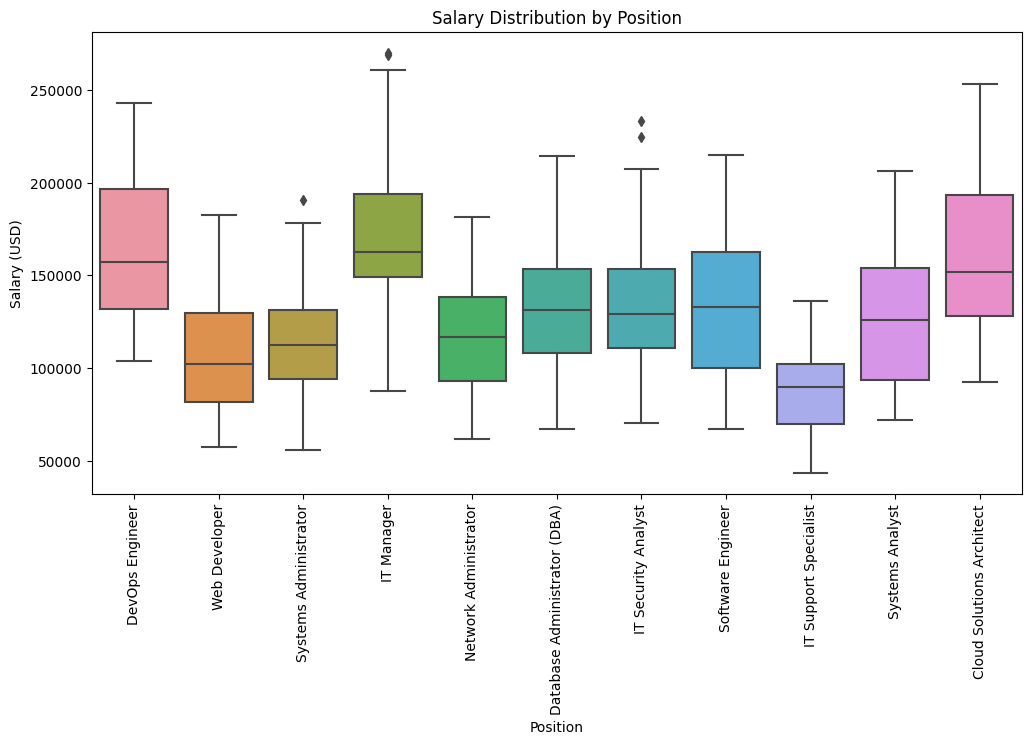

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Salary distribution by position
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Position', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary (USD)')
plt.show()

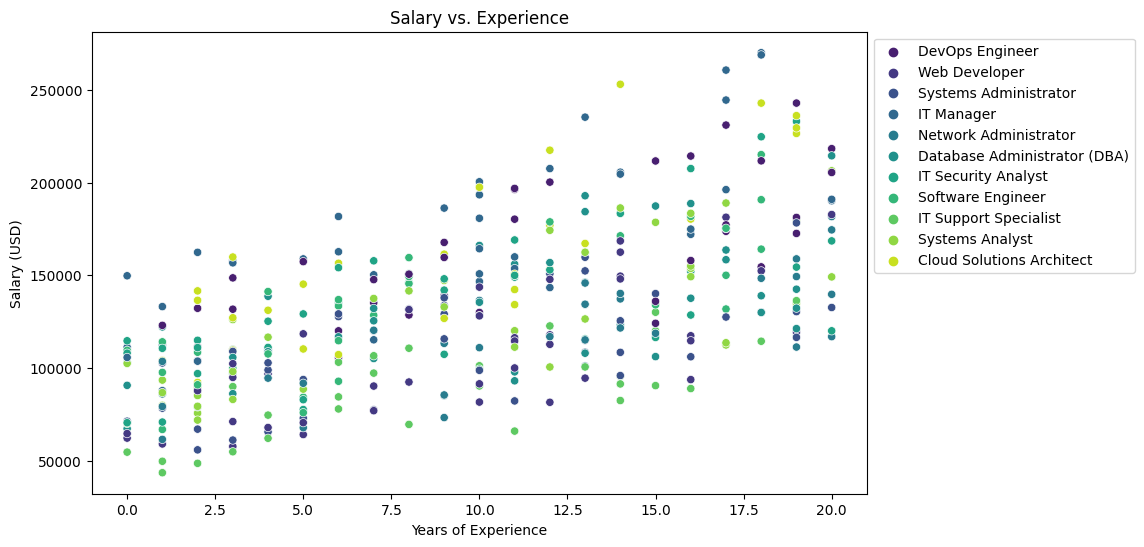

In [13]:
# Average salary by experience
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Experience (Years)', y='Salary', hue='Position', palette='viridis')
plt.title('Salary vs. Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [14]:
# Gender distribution
gender_counts = data['Gender'].value_counts()
print("\nGender distribution:")
print(gender_counts)


Gender distribution:
Gender
M    202
F    198
Name: count, dtype: int64


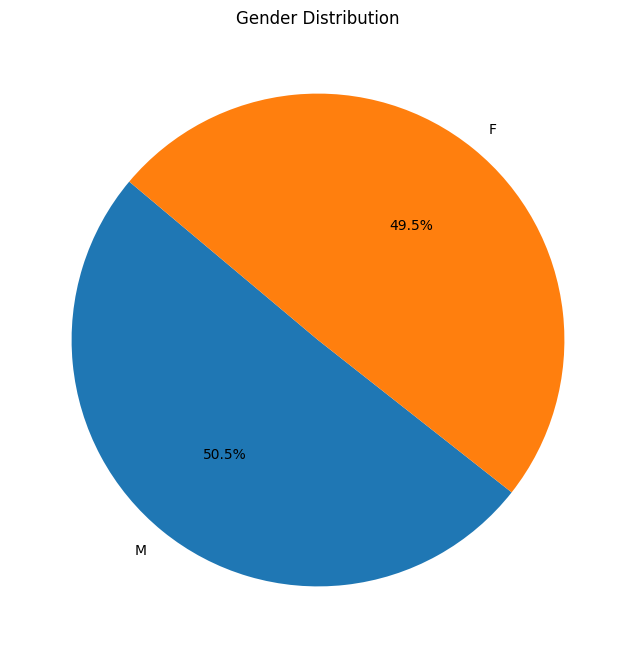

In [15]:
# Pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

In [16]:
data.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Position'] = label_encoder.fit_transform(data['Position'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [23]:
x = data.iloc[:,1:4]
x

,Gender,Experience (Years),Position
0,0,4,2
1,1,6,2
2,1,17,10
3,1,7,8
4,0,13,8
...,...,...,...
395,0,19,0
396,0,20,10
397,0,9,6
398,1,18,1


In [24]:
y = data.iloc[:,-1]
y


0      109976
1      120088
2      181301
3       77530
4      152397
        ...  
395    236045
396    182770
397     85550
398    129996
399    169058
Name: Salary, Length: 400, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier(n_estimators=100,random_state=1)
Model.fit(x,y)

RandomForestClassifier(random_state=1)

In [27]:
y_pred = Model.predict(x_test)


In [28]:
Model.score(x_test,y_test)


0.7375

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

345810790.7625

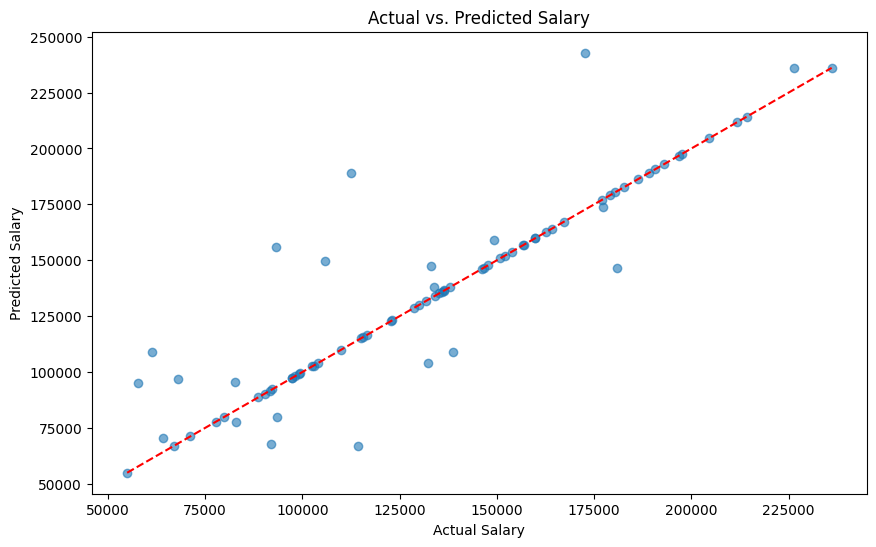

In [30]:
# Plot Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mse

345810790.7625

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


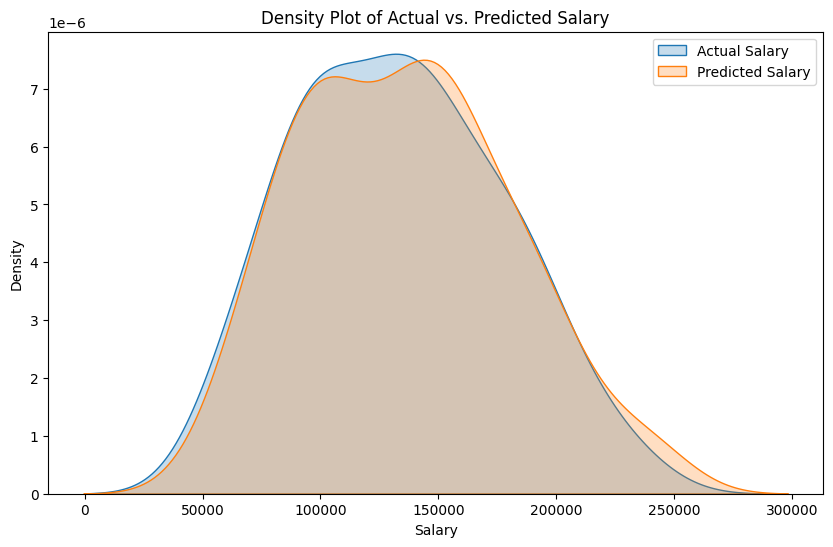

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Salary', fill=True)
sns.kdeplot(y_pred, label='Predicted Salary', fill=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs. Predicted Salary')
plt.legend()
plt.show()